In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# SECTION 1 – Data Cleaning

# Load the dataset from the data folder
df = pd.read_csv('../data/telco_churn.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Strip whitespace from string values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convert 'TotalCharges' to float, replacing non-convertible entries with NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows where 'TotalCharges' is missing (optional)
df = df.dropna(subset=["TotalCharges"])
df = df.reset_index(drop=True)

# Convert binary "Yes"/"No" columns to boolean
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": True, "No": False})

# Replace "No phone service" with "No" in 'MultipleLines'
if "MultipleLines" in df.columns:
    df["MultipleLines"] = df["MultipleLines"].replace("No phone service", "No")

# Replace "No internet service" with "No" in internet-related service columns
internet_cols = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]
for col in internet_cols:
    df[col] = df[col].replace("No internet service", "No")

# Convert 'SeniorCitizen' from integer to boolean
df["SeniorCitizen"] = df["SeniorCitizen"].astype(bool)

# Check for remaining missing values
df.isnull().sum()

# Export cleaned dataframe for analysis
df.to_csv("../data/telco_churn_clean.csv", index=False)

In [21]:
# SECTION 2.1 – Univariate Analysis: Categorical Variables

categorical_cols = df.select_dtypes(include="object").columns.tolist()
if "customerID" in categorical_cols:
    categorical_cols.remove("customerID")

print("\n--- SECTION 2.1 – Descriptive Statistics for Categorical Variables ---")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("\nPercentages:")
    print(round(df[col].value_counts(normalize=True) * 100, 2))



--- SECTION 2.1 – Descriptive Statistics for Categorical Variables ---

--- gender ---
gender
Male      3549
Female    3483
Name: count, dtype: int64

Percentages:
gender
Male      50.47
Female    49.53
Name: proportion, dtype: float64

--- MultipleLines ---
MultipleLines
No     4065
Yes    2967
Name: count, dtype: int64

Percentages:
MultipleLines
No     57.81
Yes    42.19
Name: proportion, dtype: float64

--- InternetService ---
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Percentages:
InternetService
Fiber optic    44.03
DSL            34.36
No             21.62
Name: proportion, dtype: float64

--- OnlineSecurity ---
OnlineSecurity
No     5017
Yes    2015
Name: count, dtype: int64

Percentages:
OnlineSecurity
No     71.35
Yes    28.65
Name: proportion, dtype: float64

--- OnlineBackup ---
OnlineBackup
No     4607
Yes    2425
Name: count, dtype: int64

Percentages:
OnlineBackup
No     65.51
Yes    34.49
Name: proportion, dty

### ✍️ Interpretation – Categorical Variables

Most categorical variables show a fairly balanced distribution.  
- Gender is evenly split between Male and Female.
- 58% of customers do not have multiple phone lines.
- A significant portion (~44%) use fiber optic internet, which may indicate greater service usage.
- However, most customers **do not** subscribe to additional services like OnlineSecurity, Backup, or DeviceProtection.
- The most common contract is month-to-month (~55%), which could indicate lower commitment.
- The dominant payment method is **Electronic Check**, suggesting a user base preferring flexible payment over automatic options.

In [22]:
# SECTION 2.2 – Univariate Analysis: Numerical Variables

numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

print("\n--- SECTION 2.2 – Descriptive Statistics for Numerical Variables ---")
print(df[numerical_cols].describe())

print("\n--- Mean vs Median Comparison ---")
for col in numerical_cols:
    mean = df[col].mean()
    median = df[col].median()
    print(f"{col}: mean = {round(mean, 2)}, median = {round(median, 2)}")

summary_stats = df[numerical_cols].agg(["mean", "median", "std", "min", "max"]).T
summary_stats.columns = ["Mean", "Median", "Std Dev", "Min", "Max"]
print("\n--- Summary Statistics Table ---")
print(summary_stats)


--- SECTION 2.2 – Descriptive Statistics for Numerical Variables ---
            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

--- Mean vs Median Comparison ---
tenure: mean = 32.42, median = 29.0
MonthlyCharges: mean = 64.8, median = 70.35
TotalCharges: mean = 2283.3, median = 1397.47

--- Summary Statistics Table ---
                       Mean    Median      Std Dev    Min      Max
tenure            32.421786    29.000    24.545260   1.00    72.00
MonthlyCharges    64.798208    70.350    30.085974  18.25   118.75
TotalCharges    2283.300441  1397.475  2266.771362  18.80  8684.80


### ✍️ Interpretation – Numerical Variables

- **Tenure** ranges from 1 to 72 months, with a median of 29 months, slightly below the mean (32.4), indicating a slight right-skew (some customers stay very long).
- **MonthlyCharges** has a mean lower than its median (64.8 vs 70.35), suggesting some customers pay very low amounts.
- **TotalCharges** has a heavy spread with a strong right skew. The mean (2283) is much higher than the median (1397), indicating a few very large values.

These insights suggest strong variability in customer behavior and spending patterns.


--- SECTION 2.3 – Categorical Variables vs Churn ---


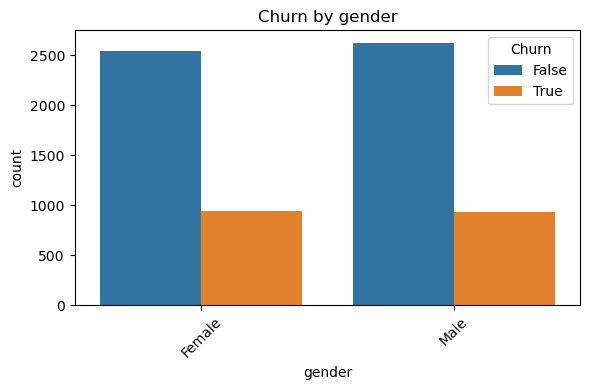

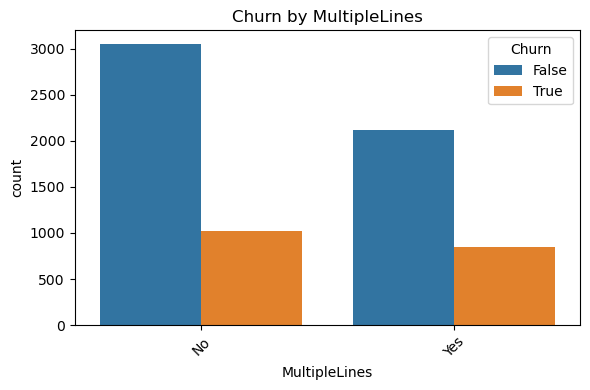

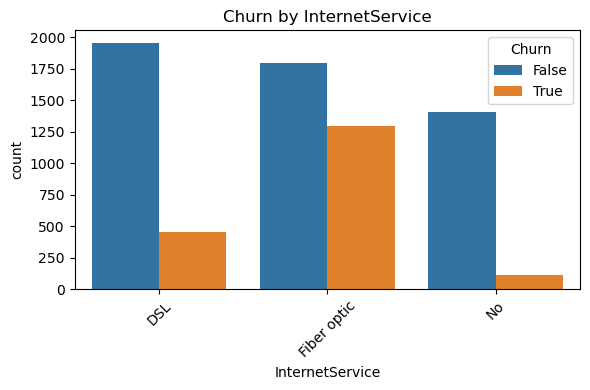

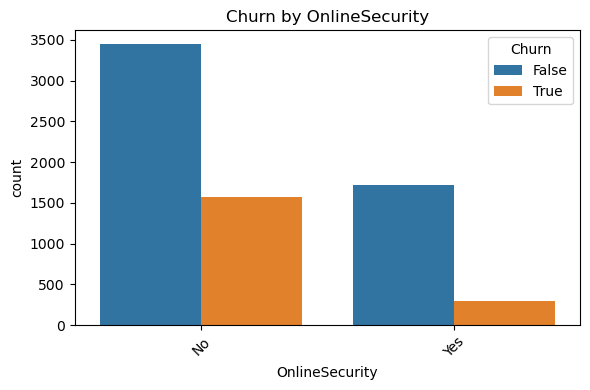

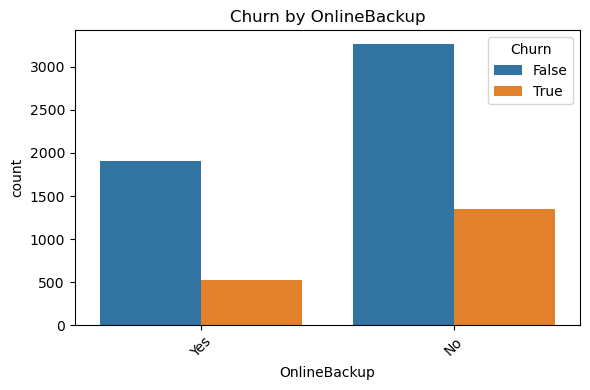

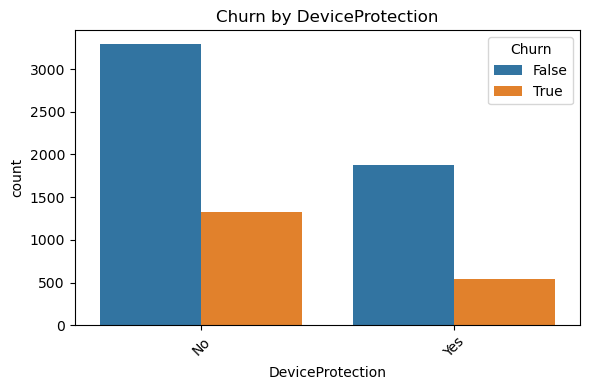

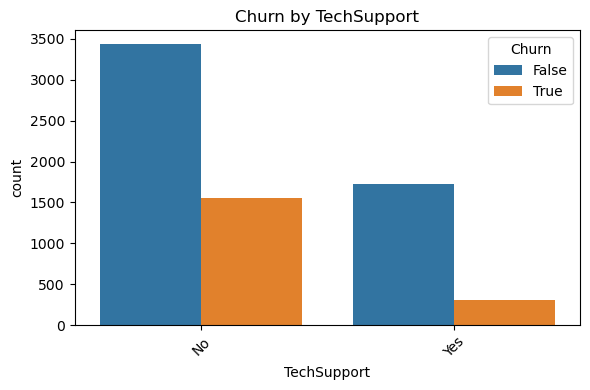

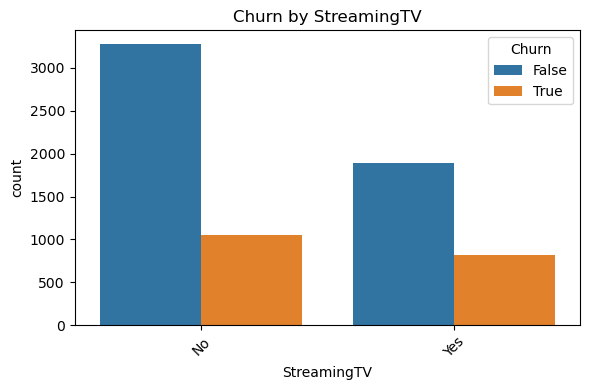

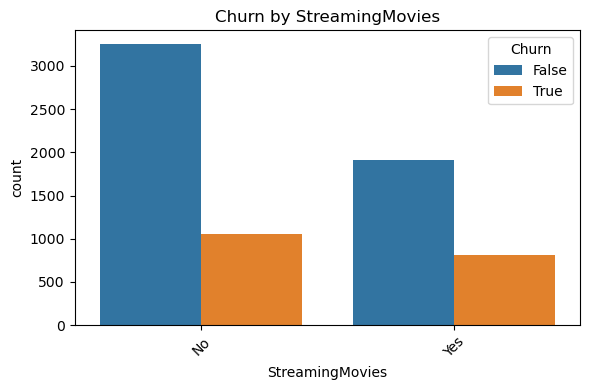

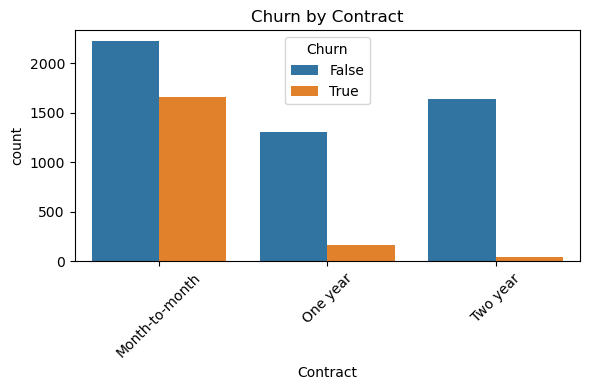

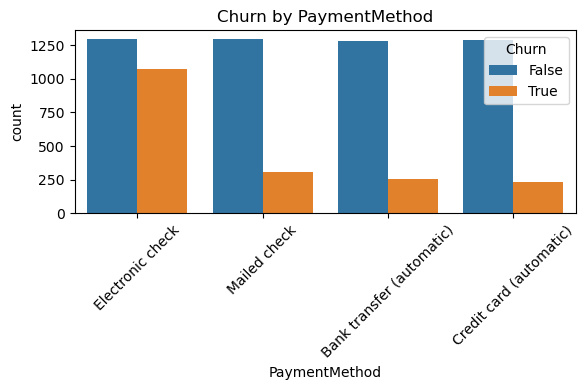


--- Churn Rate per Category ---

gender:
gender
Female    27.0
Male      26.0
Name: Churn, dtype: float64

MultipleLines:
MultipleLines
No     25.0
Yes    29.0
Name: Churn, dtype: float64

InternetService:
InternetService
DSL            19.0
Fiber optic    42.0
No              7.0
Name: Churn, dtype: float64

OnlineSecurity:
OnlineSecurity
No     31.0
Yes    15.0
Name: Churn, dtype: float64

OnlineBackup:
OnlineBackup
No     29.0
Yes    22.0
Name: Churn, dtype: float64

DeviceProtection:
DeviceProtection
No     29.0
Yes    23.0
Name: Churn, dtype: float64

TechSupport:
TechSupport
No     31.0
Yes    15.0
Name: Churn, dtype: float64

StreamingTV:
StreamingTV
No     24.0
Yes    30.0
Name: Churn, dtype: float64

StreamingMovies:
StreamingMovies
No     24.0
Yes    30.0
Name: Churn, dtype: float64

Contract:
Contract
Month-to-month    43.0
One year          11.0
Two year           3.0
Name: Churn, dtype: float64

PaymentMethod:
PaymentMethod
Bank transfer (automatic)    17.0
Credit card (a

In [23]:
# SECTION 2.3 – Categorical Variables vs Churn

print("\n--- SECTION 2.3 – Categorical Variables vs Churn ---")
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("\n--- Churn Rate per Category ---")
for col in categorical_cols:
    churn_rate = df.groupby(col)["Churn"].mean().round(2) * 100
    print(f"\n{col}:\n{churn_rate}")


### ✍️ Interpretation – Categorical Variables vs Churn

- The churn rate is **significantly higher** for customers with:
  - No online security or support
  - Month-to-month contracts
  - Electronic check payment
  - Fiber optic internet

- Conversely, churn is **lower** for customers on long-term contracts (1–2 years) and those with bundled services (security, tech support).

This suggests that service engagement and billing type strongly influence retention.


--- SECTION 2.4 – Numerical Variables vs Churn ---


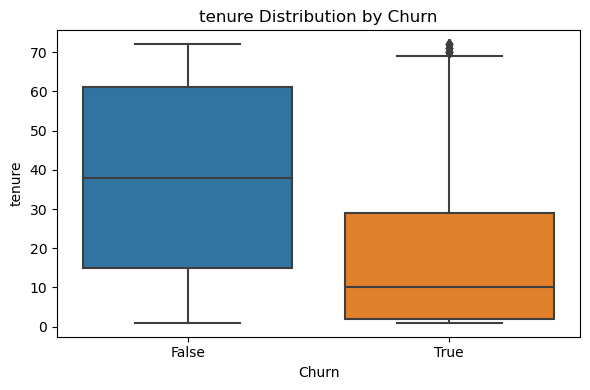


tenure grouped by Churn:
        mean  median    std
Churn                      
False  37.65    38.0  24.08
True   17.98    10.0  19.53


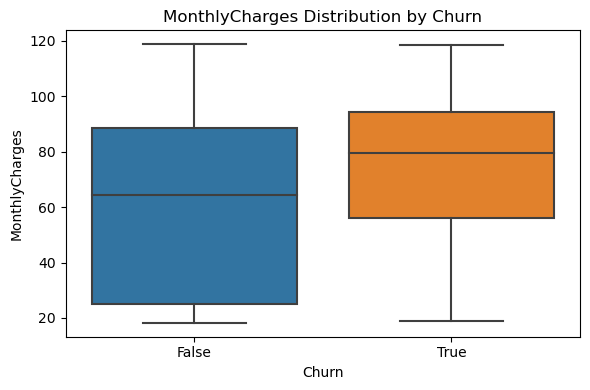


MonthlyCharges grouped by Churn:
        mean  median    std
Churn                      
False  61.31   64.45  31.09
True   74.44   79.65  24.67


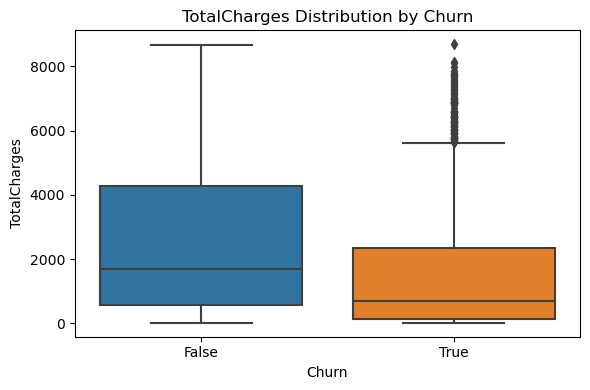


TotalCharges grouped by Churn:
          mean   median      std
Churn                           
False  2555.34  1683.60  2329.46
True   1531.80   703.55  1890.82


In [24]:
# SECTION 2.4 – Numerical Variables vs Churn

print("\n--- SECTION 2.4 – Numerical Variables vs Churn ---")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} Distribution by Churn")
    plt.tight_layout()
    plt.show()
    grouped_stats = df.groupby("Churn")[col].agg(["mean", "median", "std"]).round(2)
    print(f"\n{col} grouped by Churn:\n{grouped_stats}")

### ✍️ Interpretation – Numerical Variables vs Churn

- **Tenure**: Churners have a much lower average tenure (18 months vs 38 months for retained customers), showing they tend to leave early.
- **MonthlyCharges**: Churners pay significantly more on average ($74 vs $61), possibly due to fewer bundled discounts or extra services.
- **TotalCharges**: Lower total charges for churners ($1531 vs $2555) aligns with their shorter tenure.

The boxplots confirm these trends with clear separation between churn and non-churn distributions.


--- SECTION 2.5 – Distribution of Numerical Variables ---


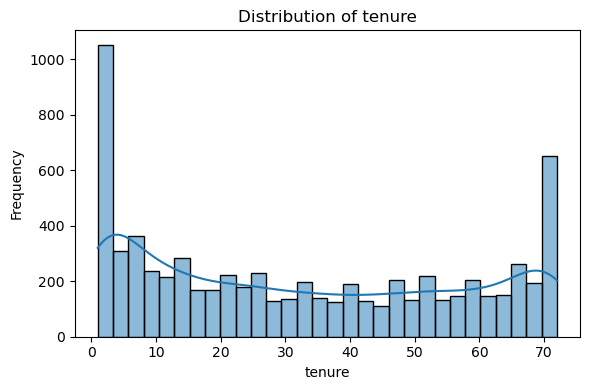


--- Value Ranges for tenure ---
tenure
(0.929, 15.2]    2459
(15.2, 29.4]     1099
(29.4, 43.6]      917
(43.6, 57.8]      947
(57.8, 72.0]     1610
Name: count, dtype: int64


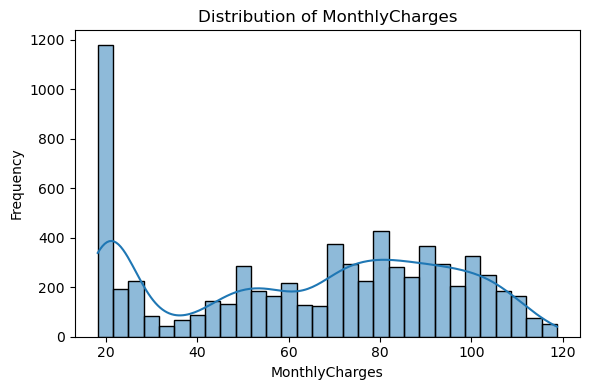


--- Value Ranges for MonthlyCharges ---
MonthlyCharges
(18.15, 38.35]     1791
(38.35, 58.45]     1003
(58.45, 78.55]     1365
(78.55, 98.65]     1825
(98.65, 118.75]    1048
Name: count, dtype: int64


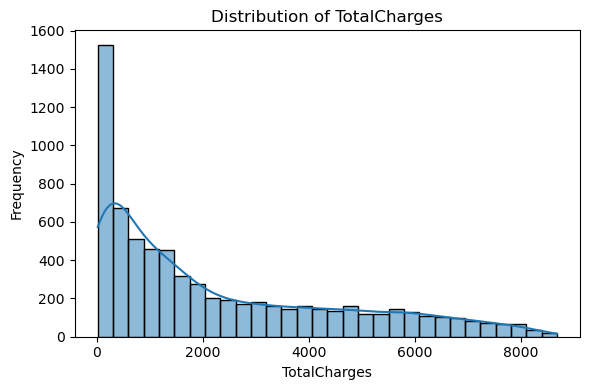


--- Value Ranges for TotalCharges ---
TotalCharges
(10.134, 1752.0]    3937
(1752.0, 3485.2]    1179
(3485.2, 5218.4]     866
(5218.4, 6951.6]     705
(6951.6, 8684.8]     345
Name: count, dtype: int64


In [25]:
# SECTION 2.5 – Distribution of Numerical Variables

print("\n--- SECTION 2.5 – Distribution of Numerical Variables ---")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    print(f"\n--- Value Ranges for {col} ---")
    print(pd.cut(df[col], bins=5).value_counts().sort_index())


### ✍️ Interpretation – Distribution of Numerical Variables

- **Tenure** shows a bimodal shape: many customers are either new or long-term, with a dip in the middle range.
- **MonthlyCharges** is slightly right-skewed, with many customers paying under $80.
- **TotalCharges** is heavily skewed to the right, with most customers below $3,500.

These distributions suggest a wide variety of customer profiles, with a mix of short-term and high-value users.


--- SECTION 3.1 – Correlation Analysis of Numerical Variables ---

Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges     Churn
tenure          1.000000        0.246862      0.825880 -0.354049
MonthlyCharges  0.246862        1.000000      0.651065  0.192858
TotalCharges    0.825880        0.651065      1.000000 -0.199484
Churn          -0.354049        0.192858     -0.199484  1.000000


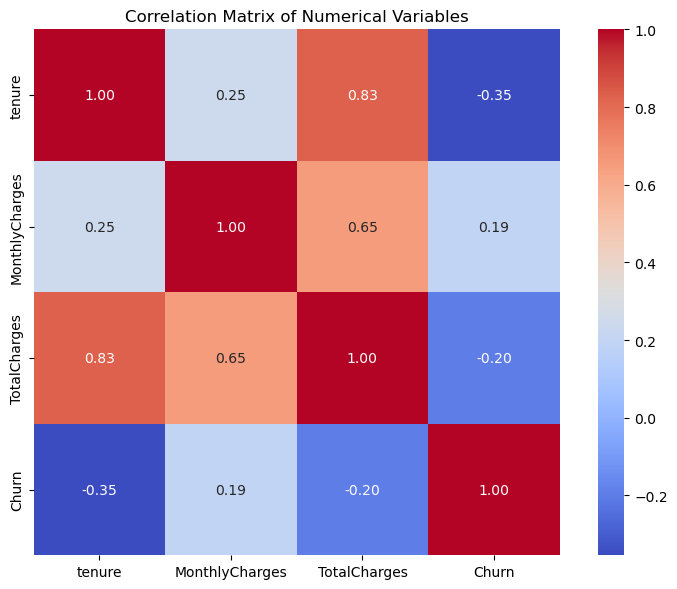

In [26]:
# SECTION 3.1 – Correlation Analysis of Numerical Variables
print("\n--- SECTION 3.1 – Correlation Analysis of Numerical Variables ---")

# Select numerical features for correlation
corr_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
# Include Churn as numeric
df_corr = df[corr_cols + ["Churn"]].copy()
df_corr["Churn"] = df_corr["Churn"].astype(int)

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()


### 🔍 Section 3.1 – Correlation Analysis: Interpretation

The correlation matrix reveals several key insights:

- **Tenure vs TotalCharges (r = 0.83)**:  
  A very strong positive correlation, which makes sense: the longer a customer has stayed, the more they have paid in total.

- **Tenure vs Churn (r = -0.35)**:  
  A moderate negative correlation. This suggests that customers with shorter tenures are more likely to churn. Longevity tends to reflect satisfaction or long-term commitment.

- **MonthlyCharges vs TotalCharges (r = 0.65)**:  
  A moderate positive correlation. While higher monthly charges contribute to higher total charges, the strength is less than expected—likely due to variability in customer tenure.

- **MonthlyCharges vs Churn (r = 0.19)** and **TotalCharges vs Churn (r = -0.20)**:  
  These weak correlations suggest some association: customers paying more monthly might churn slightly more often, and customers who have paid more in total tend to churn less.

Overall, tenure shows the most significant relationship with churn, reinforcing its value as a potential predictive feature.


--- SECTION 3.2 – Multivariate Visual Analysis ---


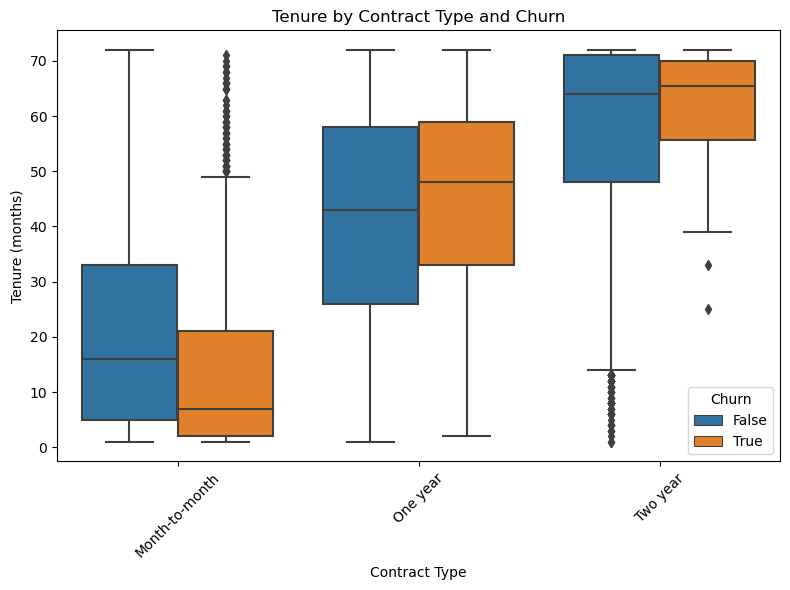

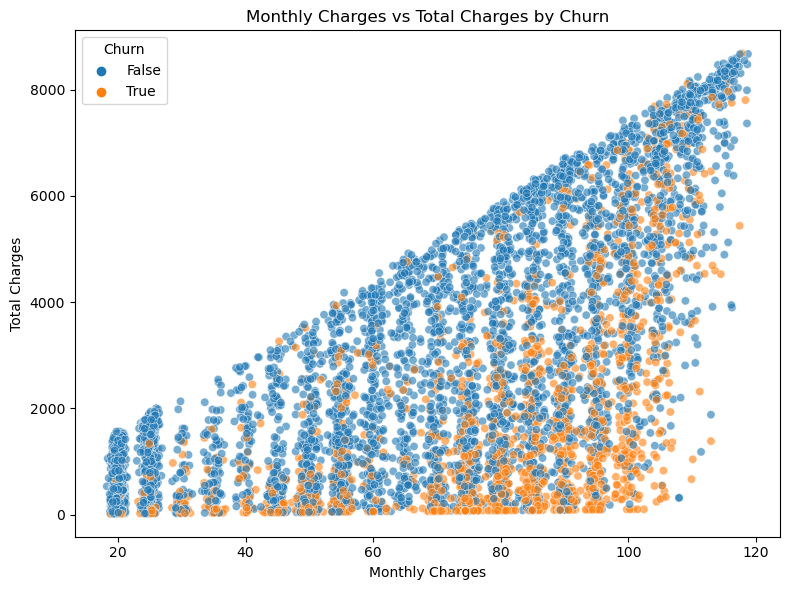


--- Summary Statistics: Tenure by Contract and Churn ---
                       mean  median    std  count
Contract       Churn                             
Month-to-month False  21.03    16.0  18.40   2220
               True   14.02     7.0  15.83   1655
One year       False  41.71    43.0  19.07   1306
               True   44.96    48.0  18.37    166
Two year       False  56.95    64.0  17.88   1637
               True   61.27    65.5  11.00     48

--- Summary Statistics: Charges by Churn ---
      MonthlyCharges                     TotalCharges                        
                mean median    std count         mean   median      std count
Churn                                                                        
False          61.31  64.45  31.09  5163      2555.34  1683.60  2329.46  5163
True           74.44  79.65  24.67  1869      1531.80   703.55  1890.82  1869


In [27]:
# SECTION 3.2 – Multivariate Visual Analysis
print("\n--- SECTION 3.2 – Multivariate Visual Analysis ---")

# Boxplot: Contract vs Tenure with Churn as hue
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Contract", y="tenure", hue="Churn")
plt.title("Tenure by Contract Type and Churn")
plt.xlabel("Contract Type")
plt.ylabel("Tenure (months)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatterplot: MonthlyCharges vs TotalCharges colored by Churn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn", alpha=0.6)
plt.title("Monthly Charges vs Total Charges by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.tight_layout()
plt.show()

# Summary statistics: Tenure by Contract and Churn
print("\n--- Summary Statistics: Tenure by Contract and Churn ---")
tenure_summary = df.groupby(["Contract", "Churn"])["tenure"].agg(["mean", "median", "std", "count"]).round(2)
print(tenure_summary)

# Summary statistics: MonthlyCharges and TotalCharges by Churn
print("\n--- Summary Statistics: Charges by Churn ---")
charges_summary = df.groupby("Churn")[["MonthlyCharges", "TotalCharges"]].agg(["mean", "median", "std", "count"]).round(2)
print(charges_summary)

### 📊 Analysis – SECTION 3.2: Multivariate Visual Analysis

**1. Tenure by Contract Type and Churn:**
- Customers with longer-term contracts (*One year* and *Two year*) have significantly higher tenure compared to *Month-to-month* users.
- Among Month-to-month customers, churners have a **very short tenure** (median = 7 months), while non-churners have a median of 16 months.
- Interestingly, for One-year and Two-year contracts, churners exhibit **similar or even higher tenure** than loyal customers, likely because they wait until their commitment ends before leaving.

> Contract type plays a major role in churn: Month-to-month plans carry a much higher churn risk.

---

**2. Monthly and Total Charges by Churn:**
- Churned customers pay **higher MonthlyCharges** on average (**€74.44** vs **€61.31**), suggesting **price sensitivity** may drive cancellations.
- However, their **TotalCharges are much lower** (mean = **€1531.80** vs **€2555.34**), which implies they **leave early** and contribute less to customer lifetime value.

> Customers with high monthly fees but short tenure are at high risk and less profitable — these should be monitored closely.

---

**Conclusion:**
- Churn is strongly associated with **contract type, tenure, and monthly charges**.
- Long-term contracts retain users better, while **high cost + short tenure** indicates risk.
- These combined insights justify **targeted retention strategies** based on user profiles.

In [28]:
# SECTION 3.3 – Exploratory Feature Engineering
print("\n--- SECTION 3.3 – Exploratory Feature Engineering ---")

# 1. IsNewCustomer: customers with tenure < 6 months
# Hypothesis: New customers are more likely to churn
df["IsNewCustomer"] = df["tenure"] < 6

# 2. IsLongTerm: customers on a One year or Two year contract
# Hypothesis: Long-term contracts reduce churn risk
df["IsLongTerm"] = df["Contract"].isin(["One year", "Two year"])

# 3. HasFiber: customer is subscribed to Fiber optic internet
# Hypothesis: Fiber users may be more demanding / have higher churn
df["HasFiber"] = df["InternetService"] == "Fiber optic"

# 4. IsTechProtected: customer has technical support enabled
# Hypothesis: Support users may experience fewer issues and churn less
df["IsTechProtected"] = df["TechSupport"] == "Yes"

# Display the first few rows of the new engineered features
print("\nSample of engineered features:\n", df[["IsNewCustomer", "IsLongTerm", "HasFiber", "IsTechProtected"]].head())

# Optional: Save updated dataframe with engineered features
df.to_csv("../data/telco_churn_enriched.csv", index=False)


--- SECTION 3.3 – Exploratory Feature Engineering ---

Sample of engineered features:
    IsNewCustomer  IsLongTerm  HasFiber  IsTechProtected
0           True       False     False            False
1          False        True     False            False
2           True       False     False            False
3          False        True     False             True
4           True       False      True            False


In [29]:
# SECTION 4.1 – Feature Encoding
print("\n--- SECTION 4.1 – Feature Encoding ---")

# Encode the target variable
df["Churn"] = df["Churn"].astype(int)

# Identify categorical columns to encode (excluding engineered and boolean columns)
exclude_cols = [
    "customerID", "Churn", "IsNewCustomer", "IsLongTerm", "HasFiber", "IsTechProtected"
]
cat_cols = df.select_dtypes(include="object").columns.difference(exclude_cols).tolist()

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Export encoded data
df_encoded.to_csv("../data/telco_churn_encoded.csv", index=False)
print("Feature encoding complete. Encoded dataset saved as 'telco_churn_encoded.csv'")




--- SECTION 4.1 – Feature Encoding ---
Feature encoding complete. Encoded dataset saved as 'telco_churn_encoded.csv'


✅ The engineered features created in Section 3.3 (e.g., `IsNewCustomer`, `IsLongTerm`, `HasFiber`, `IsTechProtected`) are effectively utilized in the modeling process.  
They have been integrated into the final dataset and encoded alongside the original features during preprocessing.  
This confirms that the feature engineering step is not redundant but rather essential to enrich the dataset with potentially predictive variables before training the models.

In [31]:
# SECTION 4.2 – Model training and Model evaluation
print("\n--- SECTION 4.2 – Model Training and Model evaluation---")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load encoded dataset
df_model = pd.read_csv("../data/telco_churn_encoded.csv")

# Separate features and target
X = df_model.drop(columns=["Churn", "customerID"], errors='ignore')
y = df_model["Churn"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


--- SECTION 4.2 – Model Training and Model evaluation---

Logistic Regression Results:
Accuracy: 0.7874911158493249
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[928 105]
 [194 180]]

Random Forest Results:
Accuracy: 0.7874911158493249
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Confusion Matrix:
 [[932 101]
 [198 176]]


### 📝 Model Evaluation – Logistic Regression & Random Forest

- **Overall Accuracy**: Both models achieve around **78.7%**, meaning they correctly predict churn or non-churn in nearly 79% of cases.

- **Class Imbalance Impact**: The models perform well on predicting **non-churners**, but are weaker on detecting **churners**.

- **Precision (Churn = 1)**:
  - Logistic Regression: **63%**
  - Random Forest: **64%**
  → When the model predicts churn, it's correct ~63–64% of the time.

- **Recall (Churn = 1)**:
  - Logistic Regression: **48%**
  - Random Forest: **47%**
  → Less than half of the actual churners are correctly identified.

- **F1-Score (Churn = 1)**:
  - Logistic Regression: **55%**
  - Random Forest: **54%**
  → Moderate performance overall on detecting churners.

- **Confusion Matrix Insight**:
  - High number of **false negatives** (missed churners).
  - Indicates room for improvement through feature engineering, class rebalancing, or alternative algorithms.
  - The model correctly identified 928 non-churners and 180 churners, but misclassified 105 non-churners and missed 194 actual churners.


--- SECTION 4.3 – Feature Importance and Interpretation ---

Top 15 Most Important Features (Random Forest):
                           Feature  Importance
7                     TotalCharges    0.170908
6                   MonthlyCharges    0.166730
3                           tenure    0.139314
9                       IsLongTerm    0.075738
21  PaymentMethod_Electronic check    0.031514
8                    IsNewCustomer    0.028695
26                     gender_Male    0.028212
10                        HasFiber    0.027591
15     InternetService_Fiber optic    0.027086
5                 PaperlessBilling    0.024639
1                          Partner    0.023864
19              OnlineSecurity_Yes    0.022753
0                    SeniorCitizen    0.021573
18                OnlineBackup_Yes    0.020598
17               MultipleLines_Yes    0.019817


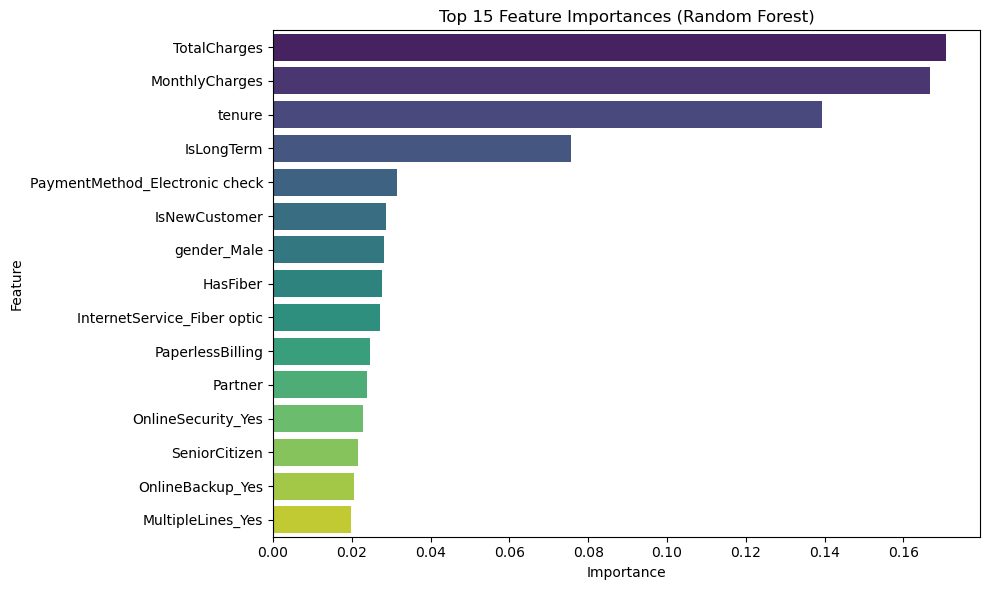


Decision Tree Results:
Accuracy: 0.7668798862828714
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.55      0.63      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407

Confusion Matrix:
 [[842 191]
 [137 237]]


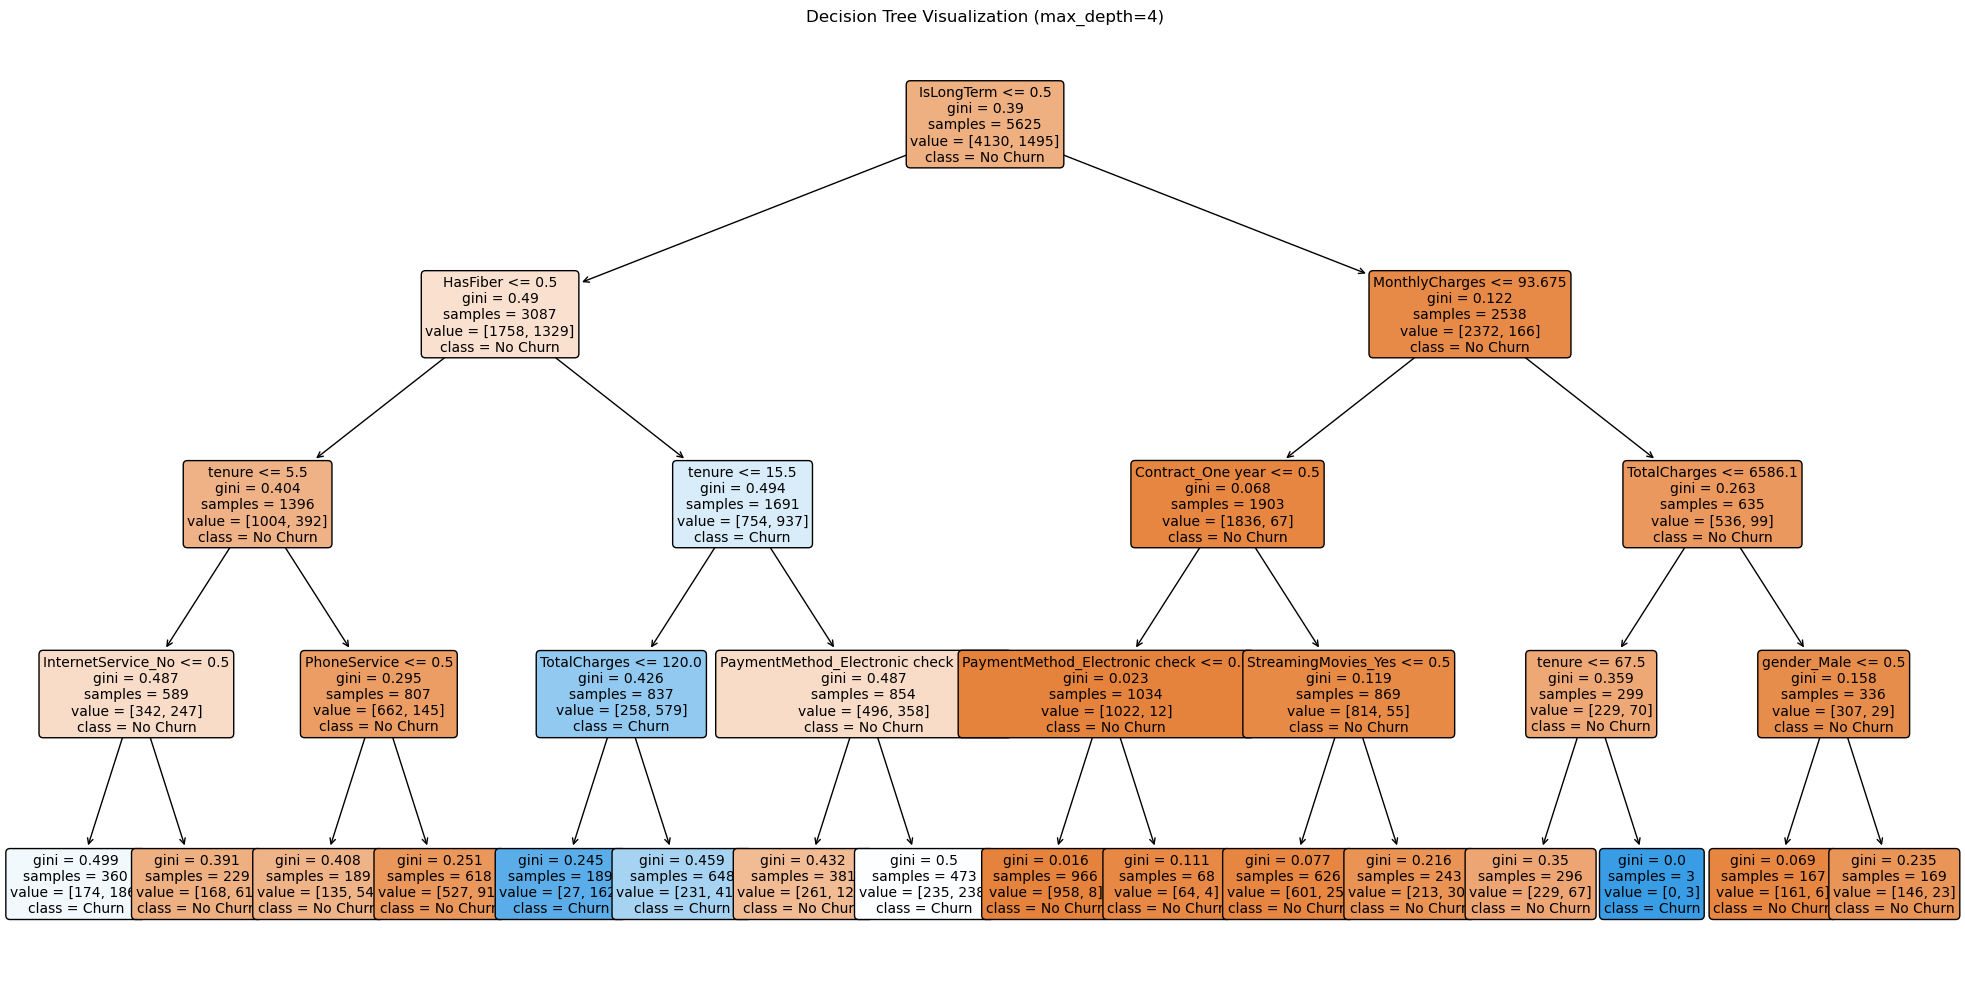

In [35]:
# SECTION 4.3 – Feature Importance and Interpretation
print("\n--- SECTION 4.3 – Feature Importance and Interpretation ---")

# Create a dataframe of feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top 15 features
print("\nTop 15 Most Important Features (Random Forest):")
print(importance_df.head(15))

# Plot top 15 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(15), palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns.tolist(), class_names=["No Churn", "Churn"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (max_depth=4)")
plt.tight_layout()
plt.show()

--- SECTION 4.3 – Feature Importance and Interpretation ---

The Random Forest model identifies the top 15 features that contribute the most to predicting customer churn:

- **TotalCharges**, **MonthlyCharges**, and **tenure** are by far the most influential features. Customers who have paid more or have been around longer tend to churn differently. High monthly charges and short tenure are typically associated with higher churn risk.

- **IsLongTerm**: A derived variable indicating whether the customer has a long-term contract (One year or Two year). Its high importance highlights the protective effect of long-term contracts against churn.

- **IsNewCustomer**: A binary flag for customers with very short tenure. New customers appear to churn more frequently.

- Other factors such as **Electronic check payment method**, **being Male**, and having **Fiber optic Internet** show measurable but smaller impacts on churn prediction.

This analysis helps us understand which business levers may reduce churn — for example, promoting long-term contracts or targeting high-risk new customers.

# 📌 Final Conclusion – Telco Customer Churn Analysis

## 1. Summary of Findings

- **Tenure** is the strongest predictor of churn: short-tenure customers are much more likely to leave.
- Customers with **high MonthlyCharges** and **low TotalCharges** are at greater risk—often recent users who pay more.
- **Contract type** has a major influence: Month-to-month customers churn significantly more than those on One or Two year contracts.
- The **Electronic Check** payment method is disproportionately used by churners.
- Customers with **Fiber optic service** or without **Technical Support** tend to churn more.

## 2. Correlation Analysis

- `TotalCharges` and `tenure` are highly correlated (0.83), as longer-tenure customers accumulate more charges.
- Churn is negatively correlated with tenure (-0.35), confirming loyalty increases with time.
- The weak positive correlation between `MonthlyCharges` and churn (0.19) suggests price sensitivity may be a churn driver.

## 3. Multivariate Insights

- Visualizations reveal a **clear risk cluster**: customers with short tenure, high monthly charges, and month-to-month contracts.
- **Scatter plots** show churners often have low lifetime value and high ongoing costs.
- Customers on **long-term contracts** are generally stable with high TotalCharges and low churn.
- Our engineered features (IsNewCustomer, IsLongTerm, HasFiber) provided crucial signals for modeling and segmentation.

## 4. Modeling Performance

- Both **Logistic Regression** and **Random Forest** achieved ≈ **78.7% accuracy**.
- Precision and recall for churn prediction are moderate (≈ 63% and 48% respectively), reflecting class imbalance.
- Confusion matrices confirm good identification of loyal customers, but more missed churners.
- Models offer **valuable early warning signals** for customer retention, even if imperfect.

## 5. Feature Importance

- Top predictors include:
  - `TotalCharges`, `MonthlyCharges`, `tenure`
  - `IsLongTerm`, `IsNewCustomer`, `HasFiber`
  - `PaymentMethod_Electronic check`, `PaperlessBilling`
- These insights suggest actionable levers to improve retention, particularly contract type, service profile, and payment method.

---

## ✅ Strategic Recommendations

### 1. **Target high-risk segments**
- Use tenure < 6 months and high monthly charges to proactively detect and retain new churn-prone customers.
- Flag customers using **Electronic Check** or **Month-to-month contracts** for retention campaigns.

### 2. **Promote long-term commitment**
- Incentivize long-term contracts with discounts or loyalty perks to stabilize revenue and reduce volatility.

### 3. **Enhance onboarding and support**
- Provide extra onboarding and follow-up for new clients (first 6 months).
- Expand **Tech Support coverage** and position it as a premium service to reduce frustration and early exits.

### 4. **Monitor high-value churn risk**
- Pay special attention to customers with high monthly charges but low tenure—maximize their lifetime value with tailored offers.

### 5. **Refine payment methods**
- Encourage transitions from **Electronic Check** to **automatic/online billing** through incentives (e.g. one-time discounts).

### 6. **Build churn dashboards**
- Leverage the outputs of the churn prediction model to build real-time dashboards for marketing and customer success teams. These dashboards can help prioritize at-risk customers and trigger proactive retention actions.
- However, since the model’s recall for churners remains moderate (~47%), this predictive layer should be used as a support, not a standalone decision-maker.
